In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df_name = "collected_all_data.xlsx"
df = pd.read_excel(df_name, sheet_name="Sheet3")

In [3]:
df.keys()

Index(['Year', 'Population (million people)',
       'Foreign tourists (million people)', 'GDP per capita (million UZS)',
       'Plastic and rubber (trillion UZS)', 'Food (trillion UZS)',
       'Beverages (trillion UZS)', 'Electronics and optics (trillion UZS)',
       'MSW generation (million tonnes)'],
      dtype='object')

*correlations*

In [4]:
pearson_coef_pop, p_value_pop = stats.pearsonr(df['Population (million people)'], df['MSW generation (million tonnes)'])
pearson_coef_gdp, p_value_gdp = stats.pearsonr(df['GDP per capita (million UZS)'], df['MSW generation (million tonnes)'])
pearson_coef_plastic, p_value_plastic = stats.pearsonr(df['Plastic and rubber (trillion UZS)'], df['MSW generation (million tonnes)'])
pearson_coef_food, p_value_food = stats.pearsonr(df['Food (trillion UZS)'], df['MSW generation (million tonnes)'])
pearson_coef_waste_bever, p_value_waste_bever = stats.pearsonr(df['Beverages (trillion UZS)'], df['MSW generation (million tonnes)'])
pearson_coef_comp, p_value_waste_comp = stats.pearsonr(df['Electronics and optics (trillion UZS)'], df['MSW generation (million tonnes)'])
pearson_coef_tour, p_value_waste_tour = stats.pearsonr(df['Foreign tourists (million people)'], df['MSW generation (million tonnes)'])



# MLM

In [5]:
# Creating a dictionary with the coefficients and p-values
data = {
    'Variable': ['Population', 'Foreign tourists', 'GDP per capita', 'Plastic and rubber', 'Food products', 'Beverages', 'Electronics and optics'],
    'Pearson Coefficient': [pearson_coef_pop, pearson_coef_tour, pearson_coef_gdp, pearson_coef_plastic, pearson_coef_food, pearson_coef_waste_bever, pearson_coef_comp],
    'P-value': [p_value_pop, p_value_waste_tour, p_value_gdp, p_value_plastic, p_value_food, p_value_waste_bever, p_value_waste_comp]
}

# Converting the dictionary to a DataFrame
correlation_results = pd.DataFrame(data)

In [6]:
correlation_results

,Variable,Pearson Coefficient,P-value
0,Population,0.994887,2.838774e-10
1,Foreign tourists,0.646984,3.142595e-02
2,GDP per capita,0.992470,1.615233e-09
3,Plastic and rubber,0.939467,1.771412e-05
4,Food products,0.971541,6.217696e-07
5,Beverages,0.933699,2.645448e-05
6,Electronics and optics,0.893950,2.065082e-04


In [7]:
df.keys()

Index(['Year', 'Population (million people)',
       'Foreign tourists (million people)', 'GDP per capita (million UZS)',
       'Plastic and rubber (trillion UZS)', 'Food (trillion UZS)',
       'Beverages (trillion UZS)', 'Electronics and optics (trillion UZS)',
       'MSW generation (million tonnes)'],
      dtype='object')

In [8]:
# from linear fit
# a0, a1 
l_population = np.poly1d(np.polyfit(df['Population (million people)'], df['MSW generation (million tonnes)'], 1))
l_tourist = np.poly1d(np.polyfit(df['Foreign tourists (million people)'], df['MSW generation (million tonnes)'], 1))
l_gdp = np.poly1d(np.polyfit(df['GDP per capita (million UZS)'], df['MSW generation (million tonnes)'], 1))
l_plastic = np.poly1d(np.polyfit(df['Plastic and rubber (trillion UZS)'], df['MSW generation (million tonnes)'], 1))
l_food = np.poly1d(np.polyfit(df['Food (trillion UZS)'], df['MSW generation (million tonnes)'], 1))
l_beverage = np.poly1d(np.polyfit(df['Beverages (trillion UZS)'], df['MSW generation (million tonnes)'], 1))
l_computer = np.poly1d(np.polyfit(df['Electronics and optics (trillion UZS)'], df['MSW generation (million tonnes)'], 1))

In [9]:
print(l_computer)

 
0.1764 x + 6.793


In [10]:
l_computer.c[0]

np.float64(0.17639937971757985)

In [11]:
def PlotLinearEquation(model, independent_variable, dependent_variabble, Name, pearson, p_value):
    x_new = np.linspace(np.min(independent_variable), np.max(independent_variable), 100)
    y_new = model(x_new)
    plt.grid("True", linestyle="dashed")
    plt.scatter(independent_variable, dependent_variabble, s=30, color="black", marker="s")
    plt.plot(x_new, y_new, color="red", linewidth=1,
             label = fr"$Y={model.c[1]:.4f}{'+' if model.c[0] >= 0 else ''}{model.c[0]:.4f}\:X$")
    plt.plot([], [], label=f"r-value = {pearson:.4f}", alpha=0)
    plt.plot([], [], label=f"p-value = {p_value:.2e}", alpha=0)
    plt.xlabel(Name)
    plt.ylabel('MSW generation (million tonnes)')
    plt.ylim(6.4, 8.2)
    plt.yticks(np.arange(6.5, 8.05, 0.25))
    legend = plt.legend(fontsize=11)
    legend.get_frame().set_edgecolor('black')
    plt.savefig(fr"C:\Users\durdi\Documents\UzbMaqola\LinearFitEq-{Name}.png", dpi=300, bbox_inches="tight");

In [12]:
df.keys()

Index(['Year', 'Population (million people)',
       'Foreign tourists (million people)', 'GDP per capita (million UZS)',
       'Plastic and rubber (trillion UZS)', 'Food (trillion UZS)',
       'Beverages (trillion UZS)', 'Electronics and optics (trillion UZS)',
       'MSW generation (million tonnes)'],
      dtype='object')

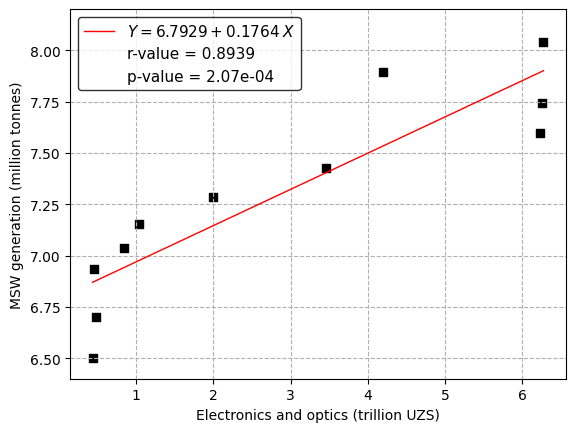

In [13]:
PlotLinearEquation(l_computer, 
                   df['Electronics and optics (trillion UZS)'], 
                   df['MSW generation (million tonnes)'],
                   'Electronics and optics (trillion UZS)', pearson_coef_comp, p_value_waste_comp)

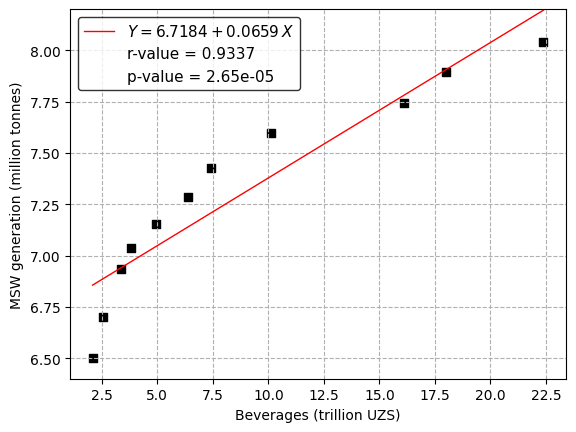

In [14]:
PlotLinearEquation(l_beverage, 
                   df['Beverages (trillion UZS)'], 
                   df['MSW generation (million tonnes)'],
                   'Beverages (trillion UZS)', pearson_coef_waste_bever, p_value_waste_bever)

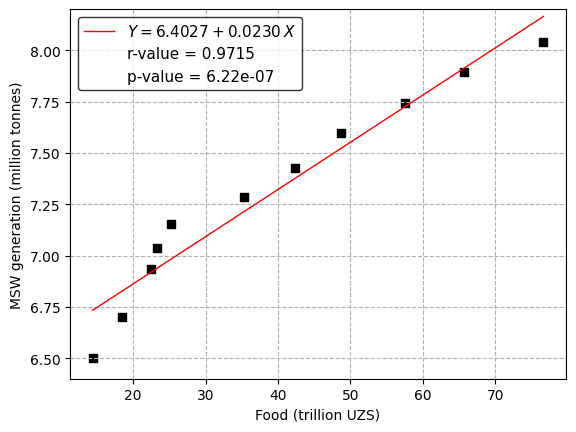

In [15]:
PlotLinearEquation(l_food, 
                   df['Food (trillion UZS)'], 
                   df['MSW generation (million tonnes)'],
                   'Food (trillion UZS)', pearson_coef_food, p_value_food)

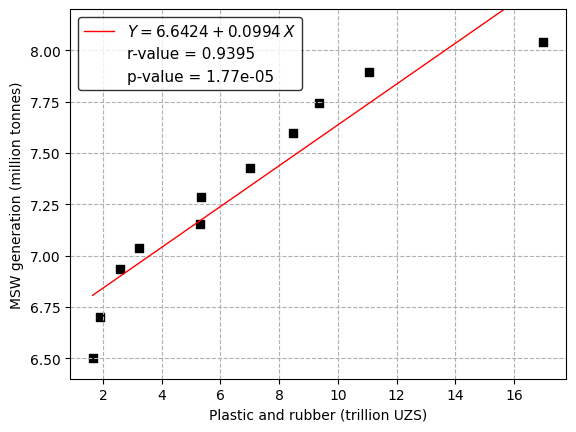

In [16]:
PlotLinearEquation(l_plastic, 
                   df['Plastic and rubber (trillion UZS)'], 
                   df['MSW generation (million tonnes)'],
                   'Plastic and rubber (trillion UZS)', pearson_coef_plastic, p_value_plastic)

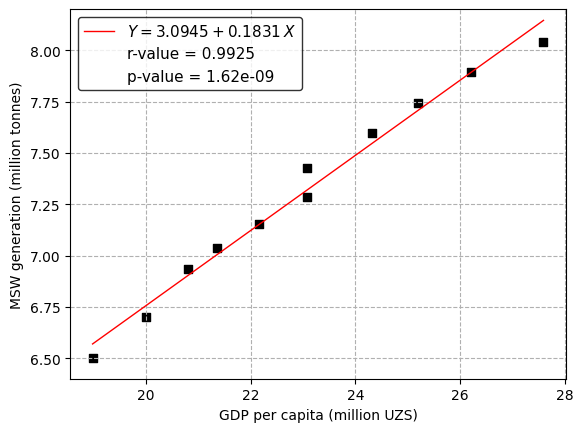

In [17]:
PlotLinearEquation(l_gdp, 
                   df['GDP per capita (million UZS)'], 
                   df['MSW generation (million tonnes)'],
                   'GDP per capita (million UZS)', pearson_coef_gdp, p_value_gdp)

In [18]:
df['Foreign tourists (million people)']

0     1.861961
1     1.917714
2     2.027035
3     2.690074
4     5.345139
5     6.746453
6     1.503902
7     1.881116
8     5.232484
9     6.625878
10    7.312452
Name: Foreign tourists (million people), dtype: float64

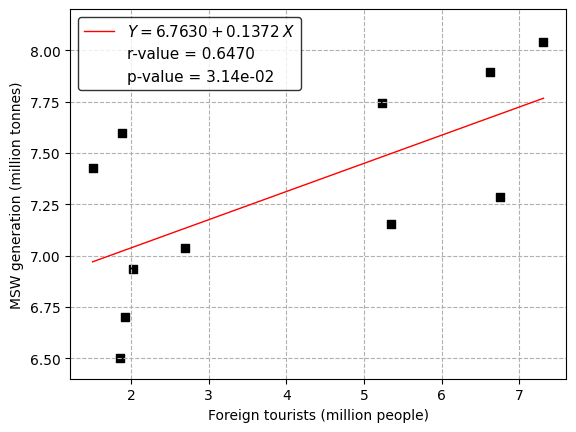

In [19]:
PlotLinearEquation(l_tourist, 
                   df['Foreign tourists (million people)'], 
                   df['MSW generation (million tonnes)'],
                   'Foreign tourists (million people)', pearson_coef_tour, p_value_waste_tour)

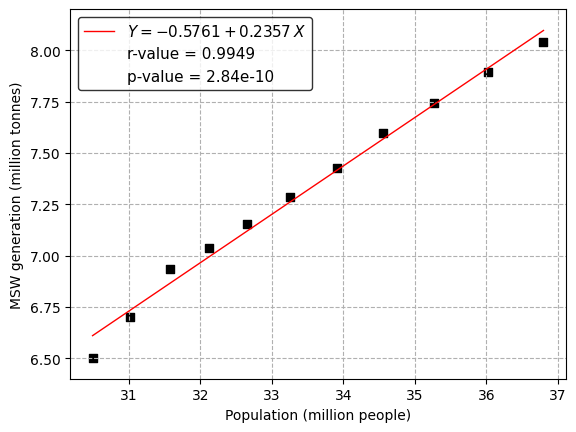

In [20]:
PlotLinearEquation(l_population, 
                   df['Population (million people)'], 
                   df['MSW generation (million tonnes)'],
                   'Population (million people)', pearson_coef_pop, p_value_pop)

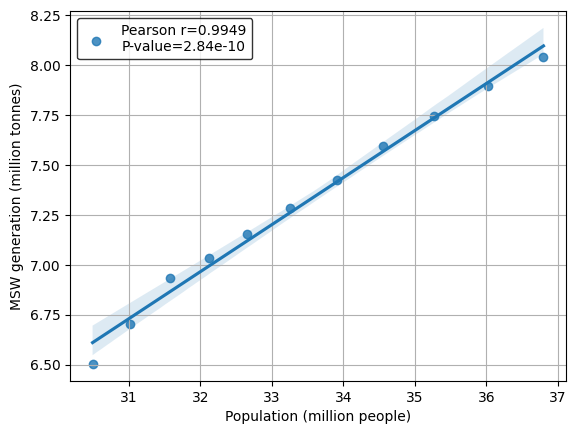

In [21]:
sns.regplot(x="Population (million people)", 
            y="MSW generation (million tonnes)", 
            data=df,
            label=f"Pearson r={pearson_coef_pop:.4f}\nP-value={p_value_pop:.2e}") # Positive Linear Relationship
# plt.ylim(0,)
plt.grid("True")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MSW-vs-Population.png", dpi=300, bbox_inches="tight");

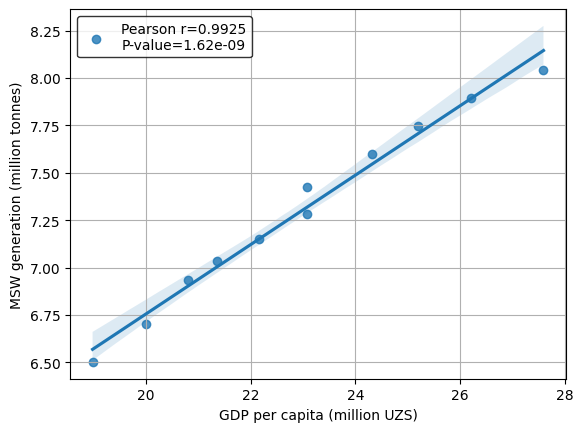

In [22]:
sns.regplot(x="GDP per capita (million UZS)", 
            y="MSW generation (million tonnes)", 
            data=df,
            label=f"Pearson r={pearson_coef_gdp:.4f}\nP-value={p_value_gdp:.2e}") # Positive Linear Relationship
# plt.ylim(0,)
plt.grid("True")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MSW-vs-GDP.png", dpi=300, bbox_inches="tight");

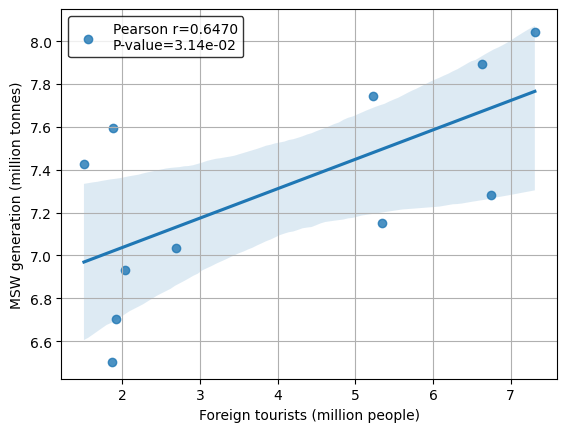

In [23]:
sns.regplot(x="Foreign tourists (million people)", 
            y="MSW generation (million tonnes)", 
            data=df,
            label=f"Pearson r={pearson_coef_tour:.4f}\nP-value={p_value_waste_tour:.2e}") # Positive Linear Relationship
# plt.ylim(0,)
plt.grid("True")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MSW-vs-Tour.png", dpi=300, bbox_inches="tight");

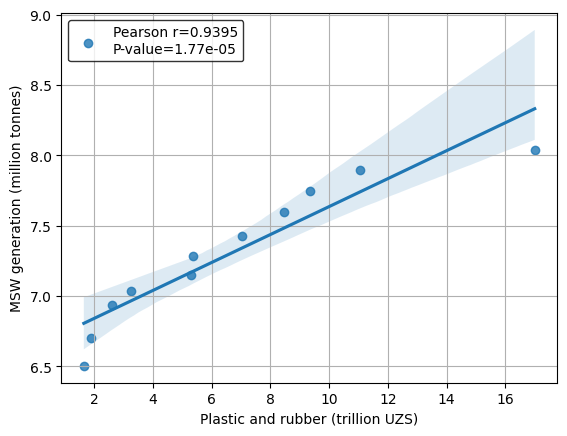

In [24]:
sns.regplot(x="Plastic and rubber (trillion UZS)", 
            y="MSW generation (million tonnes)", 
            data=df,
            label=f"Pearson r={pearson_coef_plastic:.4f}\nP-value={p_value_plastic:.2e}") # Positive Linear Relationship
# plt.ylim(0,)
plt.grid("True")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MSW-vs-Plastic.png", dpi=300, bbox_inches="tight");

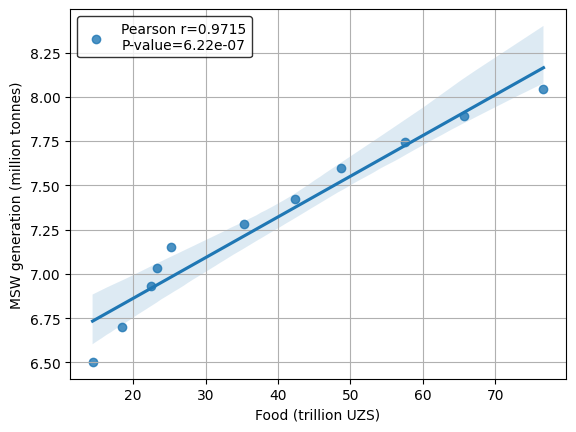

In [25]:
sns.regplot(x="Food (trillion UZS)", 
            y="MSW generation (million tonnes)", 
            data=df,
            label=f"Pearson r={pearson_coef_food:.4f}\nP-value={p_value_food:.2e}") # Positive Linear Relationship
# plt.ylim(0,)
plt.grid("True")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MSW-vs-Food.png", dpi=300, bbox_inches="tight");

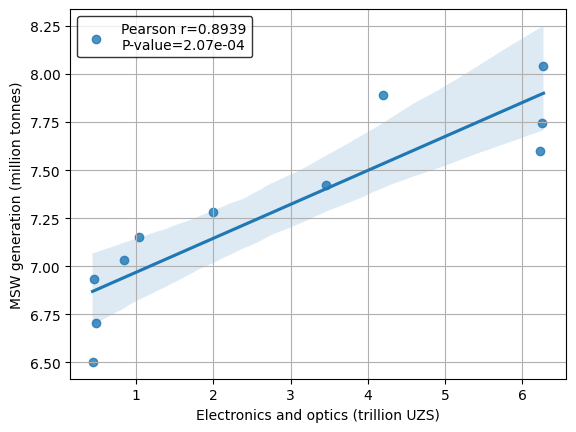

In [26]:
sns.regplot(x="Electronics and optics (trillion UZS)", 
            y="MSW generation (million tonnes)", 
            data=df,
            label=f"Pearson r={pearson_coef_comp:.4f}\nP-value={p_value_waste_comp:.2e}") # Positive Linear Relationship
# plt.ylim(0,)
plt.grid("True")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MSW-vs-Comp.png", dpi=300, bbox_inches="tight");

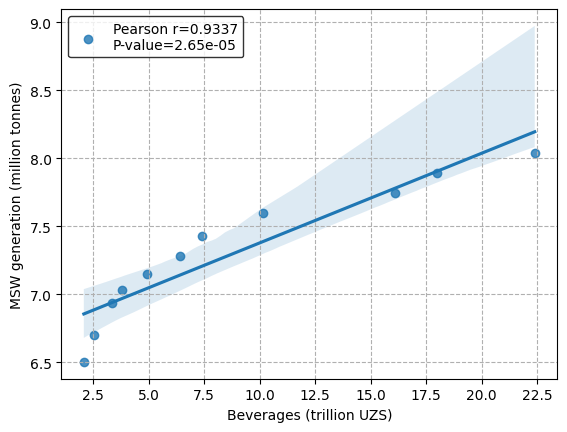

In [27]:
sns.regplot(x="Beverages (trillion UZS)", 
            y="MSW generation (million tonnes)", 
            data=df,
            label=f"Pearson r={pearson_coef_waste_bever:.4f}\nP-value={p_value_waste_bever:.2e}") # Positive Linear Relationship
# plt.ylim(0,)
plt.grid("True", linestyle="dashed")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MSW-vs-Bever.png", dpi=300, bbox_inches="tight");

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
df.keys()

Index(['Year', 'Population (million people)',
       'Foreign tourists (million people)', 'GDP per capita (million UZS)',
       'Plastic and rubber (trillion UZS)', 'Food (trillion UZS)',
       'Beverages (trillion UZS)', 'Electronics and optics (trillion UZS)',
       'MSW generation (million tonnes)'],
      dtype='object')

In [30]:
# Let's develop a model using these variables as the predictor variables.
Z = df[["Population (million people)", 
        "Foreign tourists (million people)",
        "GDP per capita (million UZS)", 
        "Plastic and rubber (trillion UZS)",
        "Food (trillion UZS)",
        "Beverages (trillion UZS)",
        "Electronics and optics (trillion UZS)"]]

In [31]:
# Fit the linear model using the four above-mentioned variables.
lm = LinearRegression()
lm.fit(Z, df["MSW generation (million tonnes)"])

LinearRegression()

In [32]:
# What is the value of the intercept(a)?
lm.intercept_

np.float64(-1.5053179644819101)

In [33]:
# What are the values of the coefficients (b1, b2, b3, b4)?
lm.coef_

array([ 0.1683396 , -0.02239217,  0.16146927, -0.01972048, -0.00781131,
        0.00212973, -0.00903123])

In [34]:
# First, let's make a prediction:
Y_hat = lm.predict(Z)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# Compute R-squared
r2_mlr = r2_score(df["MSW generation (million tonnes)"], Y_hat)
rmse_mlr = np.sqrt(mean_squared_error(df["MSW generation (million tonnes)"], Y_hat))
print(f"R-squared: {r2_mlr:.4f}")

R-squared: 0.9988


In [37]:
mse_mlr = mean_squared_error(df["MSW generation (million tonnes)"], Y_hat)
print(f"Mean Squared Error (MSE): {mse_mlr:.4f}")

Mean Squared Error (MSE): 0.0003


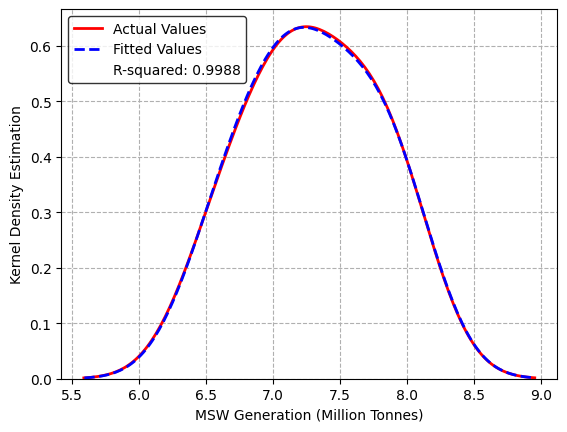

In [38]:
# plt.figure(figsize=(8, 6))

# Plot Kernel Density Estimation (KDE) for actual and fitted values
ax1 = sns.kdeplot(df['MSW generation (million tonnes)'], color="r", label="Actual Values", linewidth=2, linestyle="solid")
sns.kdeplot(Y_hat, color="b", label="Fitted Values", linewidth=2, ax=ax1, linestyle="dashed")
plt.plot([], [], label=f"R-squared: {r2_mlr:.4f}", alpha=0)

# Labels and legend
plt.xlabel('MSW Generation (Million Tonnes)')
plt.ylabel('Kernel Density Estimation')

# Show plot
plt.grid("True", linestyle="dashed")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MLRM-KDE.png", dpi=300, bbox_inches="tight");
plt.show()

# Polynomial Regression and Pipeline

In [39]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(np.min(independent_variable), np.max(independent_variable), 100)
    y_new = model(x_new)

    # plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-', 
    #          markersize=14, label=r"$a_0 + a_1 x + a_2 x^2 + a_3 x^3$")
    # plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    plt.scatter(independent_variable, dependent_variabble, s=50)
    # plt.plot(x_new, y_new, label=r"y=$a_0 + a_1 x + a_2 x^2 + a_3 x^3$", color="orange", linewidth=2)
    plt.plot(x_new, y_new, label="Polynomial fit", color="orange", linewidth=2)

    # ax = plt.gca()
    # ax.set_facecolor((0.898, 0.898, 0.898))
    # fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('MSW generation (million tonnes)')
    plt.ylim(6.4, 8.2)
    plt.yticks(np.arange(6.5, 8.05, 0.25))
    plt.grid("True", linestyle="dashed")
    # legend = plt.legend()
    # legend.get_frame().set_edgecolor('black')
    plt.savefig(fr"C:\Users\durdi\Documents\UzbMaqola\PolFit-{Name}.png", dpi=300, bbox_inches="tight");

def PlotPolly_Equation(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(np.min(independent_variable), np.max(independent_variable), 100)
    y_new = model(x_new)
    plt.scatter(independent_variable, dependent_variabble, s=30, marker="s", color="black")
    plt.plot(x_new, y_new, color="red", linewidth=1,
             label = fr"$Y={model.c[3]:.4f}{'+' if model.c[2] >= 0 else ''}{model.c[2]:.4f}\:X{'+' if model.c[1] >= 0 else ''}{model.c[1]:.4f}\:X^2{'+' if model.c[0] >= 0 else ''}{model.c[0]:.4f}\:X^3$")
    plt.xlabel(Name)
    plt.ylabel('MSW generation (million tonnes)')
    plt.ylim(6.4, 8.2)
    plt.yticks(np.arange(6.5, 8.05, 0.25))
    plt.grid("True", linestyle="dashed")
    legend = plt.legend(loc='upper left')
    legend.get_frame().set_edgecolor('black')
    plt.savefig(fr"C:\Users\durdi\Documents\UzbMaqola\PolFitEq-{Name}.png", dpi=300, bbox_inches="tight");

In [40]:
df.keys()

Index(['Year', 'Population (million people)',
       'Foreign tourists (million people)', 'GDP per capita (million UZS)',
       'Plastic and rubber (trillion UZS)', 'Food (trillion UZS)',
       'Beverages (trillion UZS)', 'Electronics and optics (trillion UZS)',
       'MSW generation (million tonnes)'],
      dtype='object')

In [41]:
# from cubic polynomial fit
# a0, a1, a2, a3, a4
p_population = np.poly1d(np.polyfit(df['Population (million people)'], df['MSW generation (million tonnes)'], 3))
p_tourist = np.poly1d(np.polyfit(df['Foreign tourists (million people)'], df['MSW generation (million tonnes)'], 3))
p_gdp = np.poly1d(np.polyfit(df['GDP per capita (million UZS)'], df['MSW generation (million tonnes)'], 3))
p_plastic = np.poly1d(np.polyfit(df['Plastic and rubber (trillion UZS)'], df['MSW generation (million tonnes)'], 3))
p_food = np.poly1d(np.polyfit(df['Food (trillion UZS)'], df['MSW generation (million tonnes)'], 3))
p_beverage = np.poly1d(np.polyfit(df['Beverages (trillion UZS)'], df['MSW generation (million tonnes)'], 3))
p_computer = np.poly1d(np.polyfit(df['Electronics and optics (trillion UZS)'], df['MSW generation (million tonnes)'], 3))

In [42]:
# Create a DataFrame with the polynomial coefficients
coefficients = {
    'Variable': ['Population', 'Tourist', 'GDP', 'Plastic', 'Food', 'Beverage', 'Computer'],
    'a3': [p_population.c[0], p_tourist.c[0], p_gdp.c[0], p_plastic.c[0], p_food.c[0], p_beverage.c[0], p_computer.c[0]],
    'a2': [p_population.c[1], p_tourist.c[1], p_gdp.c[1], p_plastic.c[1], p_food.c[1], p_beverage.c[1], p_computer.c[1]],
    'a1': [p_population.c[2], p_tourist.c[2], p_gdp.c[2], p_plastic.c[2], p_food.c[2], p_beverage.c[2], p_computer.c[2]],
    'a0': [p_population.c[3], p_tourist.c[3], p_gdp.c[3], p_plastic.c[3], p_food.c[3], p_beverage.c[3], p_computer.c[3]]
}

coeff_df = pd.DataFrame(coefficients)

In [43]:
coeff_df

,Variable,a3,a2,a1,a0
0,Population,0.002885,-0.301847,10.728279,-121.750246
1,Tourist,-0.014597,0.235461,-0.984753,8.160425
2,GDP,-0.000646,0.038159,-0.535862,7.341655
3,Plastic,0.000042,-0.007450,0.217239,6.303337
4,Food,0.000009,-0.001459,0.094226,5.454505
5,Beverage,0.000422,-0.019106,0.306534,6.038867
6,Computer,0.005452,-0.094015,0.581325,6.511862


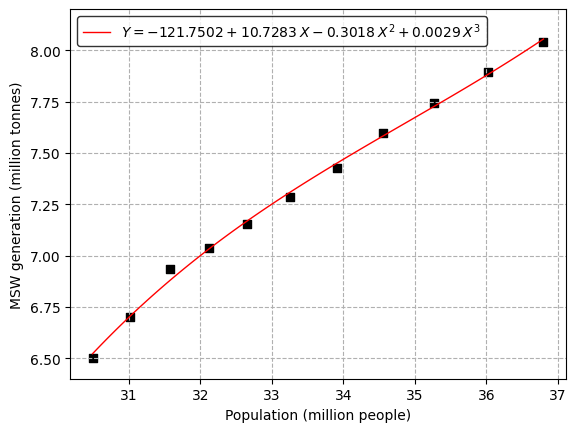

In [44]:
PlotPolly_Equation(p_population, df['Population (million people)'], 
          df['MSW generation (million tonnes)'], 
          'Population (million people)')

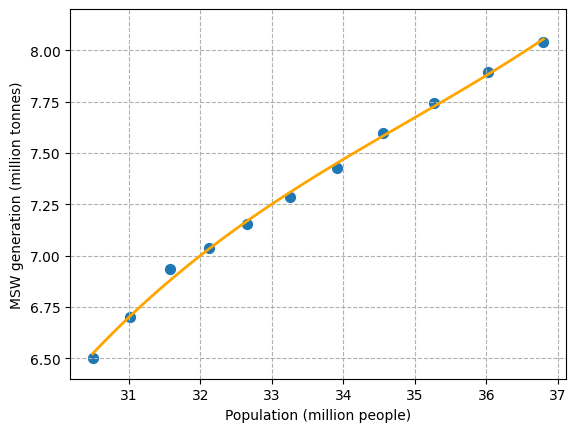

In [45]:
PlotPolly(p_population, df['Population (million people)'], 
          df['MSW generation (million tonnes)'], 
          'Population (million people)')

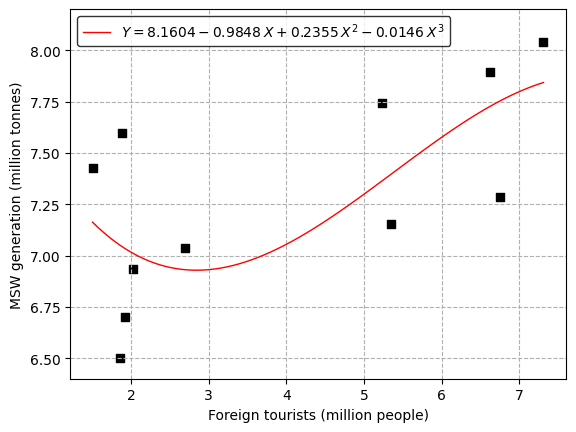

In [46]:
PlotPolly_Equation(p_tourist, df['Foreign tourists (million people)'], 
          df['MSW generation (million tonnes)'], 
          'Foreign tourists (million people)')

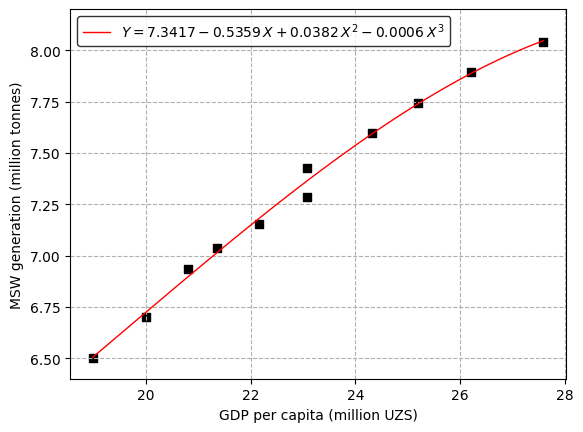

In [47]:
PlotPolly_Equation(p_gdp, df['GDP per capita (million UZS)'], 
          df['MSW generation (million tonnes)'], 
          'GDP per capita (million UZS)')

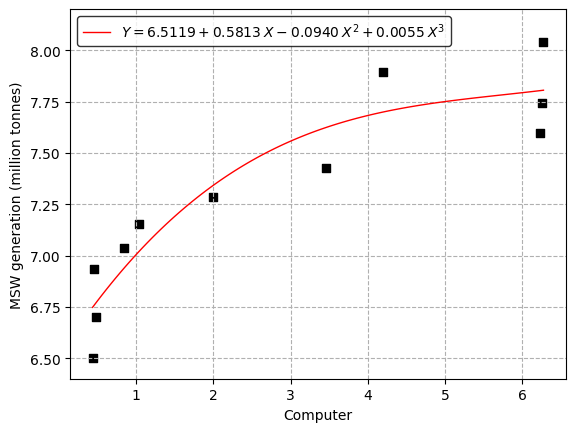

In [48]:
PlotPolly_Equation(p_computer, df['Electronics and optics (trillion UZS)'], 
          df['MSW generation (million tonnes)'], 
          'Computer')

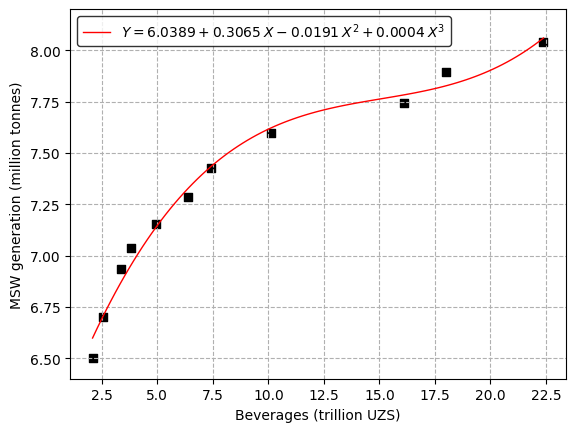

In [49]:
PlotPolly_Equation(p_beverage, df['Beverages (trillion UZS)'], 
          df['MSW generation (million tonnes)'], 
          'Beverages (trillion UZS)')

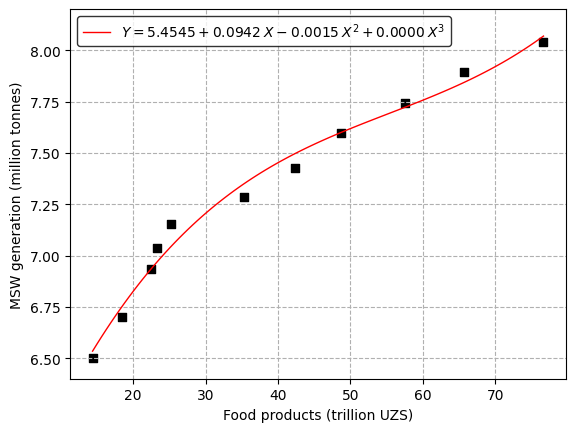

In [50]:
PlotPolly_Equation(p_food, df['Food (trillion UZS)'], 
          df['MSW generation (million tonnes)'], 
          'Food products (trillion UZS)')

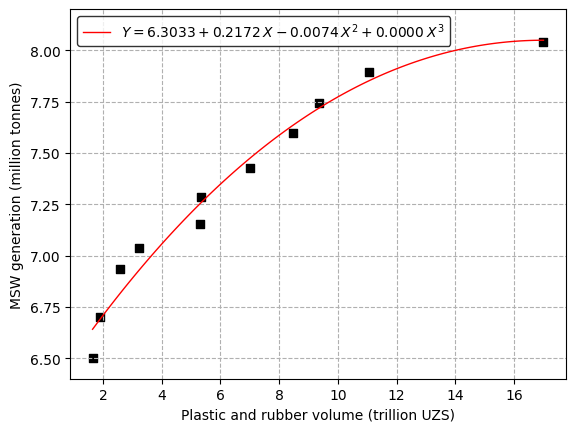

In [51]:
PlotPolly_Equation(p_plastic, df['Plastic and rubber (trillion UZS)'], 
          df['MSW generation (million tonnes)'], 
          'Plastic and rubber volume (trillion UZS)')

In [52]:
# Select predictors and target variable
X = df[['Population (million people)', 'Foreign tourists (million people)',
        'GDP per capita (million UZS)', 'Plastic and rubber (trillion UZS)',
        'Food (trillion UZS)', 'Beverages (trillion UZS)',
        'Electronics and optics (trillion UZS)']]  # Independent variables

y = df['MSW generation (million tonnes)']  # Target variable

In [53]:
from sklearn.preprocessing import PolynomialFeatures

# Generate cubic polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)  # No intercept term
X_poly = poly.fit_transform(X)

In [54]:
# Split the dataset into training (80%) and test (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [55]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict on the test set
y_pred = model.predict(X_test)

In [69]:
# Compute performance metrics
mse_mpr = mean_squared_error(y_test, y_pred)
r2_mpr = r2_score(y_test, y_pred)
rmse_mpr = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error (MSE): {mse_mpr:.4f}")
print(f"R² Score: {r2_mpr:.4f}")

Mean Squared Error (MSE): 0.0148
R² Score: 0.9542


In [70]:
# Create a DataFrame with the polynomial coefficients
metrics = {
    'Metric': ['MLR', 'MPR'],
    'R-squared': [r2_mlr, r2_mpr],
    'MSE': [mse_mlr, mse_mpr],
    'RMSE': [rmse_mlr, rmse_mpr]}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Metric,R-squared,MSE,RMSE
0,MLR,0.998847,0.000254,0.015933
1,MPR,0.954159,0.014842,0.121827


In [59]:
Y_hat_MPR = model.predict(X_poly)

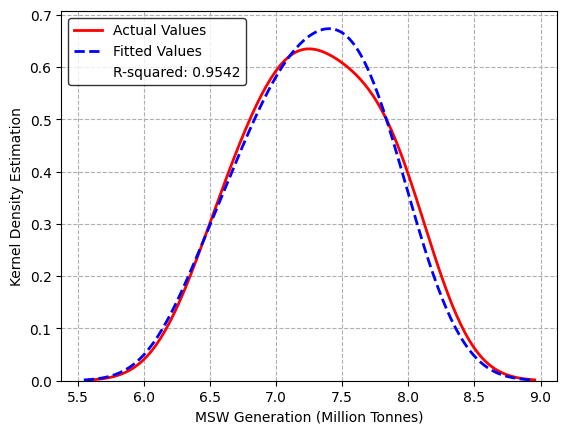

In [60]:
# plt.figure(figsize=(8, 6))

# Plot Kernel Density Estimation (KDE) for actual and fitted values
ax1 = sns.kdeplot(df['MSW generation (million tonnes)'], color="r", label="Actual Values", linewidth=2, linestyle="solid")
sns.kdeplot(Y_hat_MPR, color="b", label="Fitted Values", linewidth=2, ax=ax1, linestyle="dashed")
plt.plot([], [], label=f"R-squared: {r2_mpr:.4f}", alpha=0)

# Labels and legend
plt.xlabel('MSW Generation (Million Tonnes)')
plt.ylabel('Kernel Density Estimation')

# Show plot
plt.grid("True", linestyle="dashed")
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\MPRM-KDE.png", dpi=300, bbox_inches="tight");
plt.show()

In [61]:
model.intercept_

np.float64(5.103651181386008)

In [62]:
len(model.coef_)

119

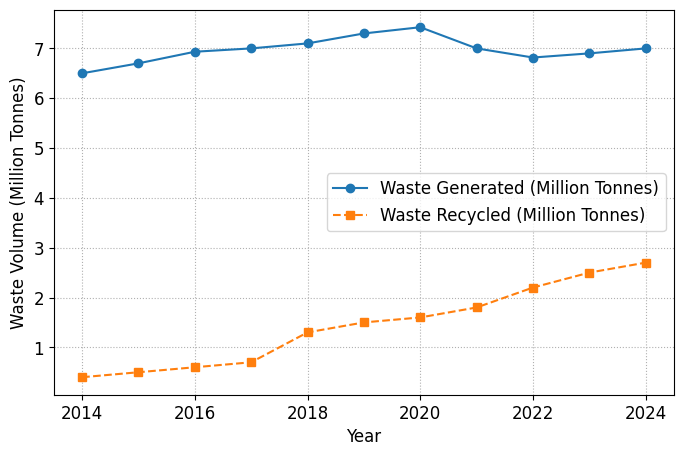

In [63]:
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams['axes.labelsize'] = 14
plt.rcParams.update({'font.size': 12})
# Data from the report (estimated and referenced values)
years = np.arange(2014, 2024 + 1)
waste_generated = [6.5, 6.7, 6.933, 7.0, 7.1, 7.3, 7.425, 7.0, 6.817, 6.9, 7.0]  # in million tonnes
waste_recycled = [0.4, 0.5, 0.6, 0.7, 1.3, 1.5, 1.6, 1.8, 2.2, 2.5, 2.7]  # in million tonnes
recycling_rate = [(r/g)*100 for r, g in zip(waste_recycled, waste_generated)]  # in percentage

# Plot 1: Waste Generation vs Waste Recycled
plt.figure(figsize=(8, 5))
plt.plot(years, waste_generated, marker='o', linestyle='-', label='Waste Generated (Million Tonnes)')
plt.plot(years, waste_recycled, marker='s', linestyle='--', label='Waste Recycled (Million Tonnes)')
plt.xlabel('Year')
plt.ylabel('Waste Volume (Million Tonnes)')
# plt.title('Waste Generation and Recycling in Uzbekistan (2014–2024)')
plt.legend()
plt.grid(True, linestyle="dotted")
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\WasteGenAndWasteRecycled.png", dpi=300, bbox_inches="tight")
plt.show()


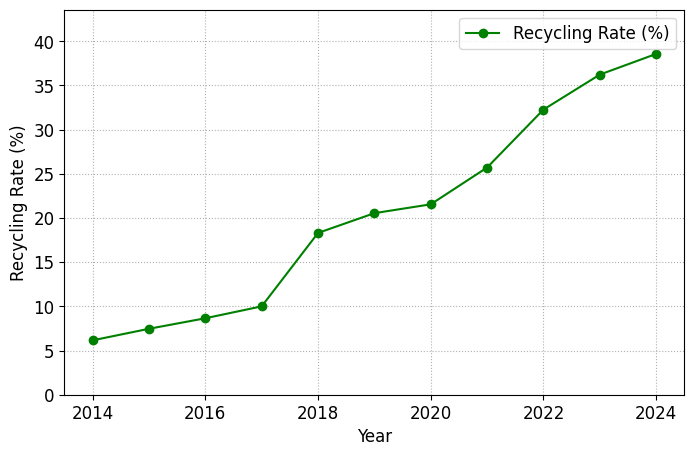

In [64]:

# Plot 2: Recycling Rate Over Time
plt.figure(figsize=(8, 5))
plt.plot(years, recycling_rate, marker='o', linestyle='-', color='g', label='Recycling Rate (%)')
plt.xlabel('Year')
plt.ylabel('Recycling Rate (%)')
# plt.title('Recycling Rate in Uzbekistan (2014–2024)')
plt.ylim(0, max(recycling_rate) + 5)
plt.legend()
plt.grid(True, linestyle="dotted")
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\WasteRecycledRate.png", dpi=300, bbox_inches="tight")
plt.show()

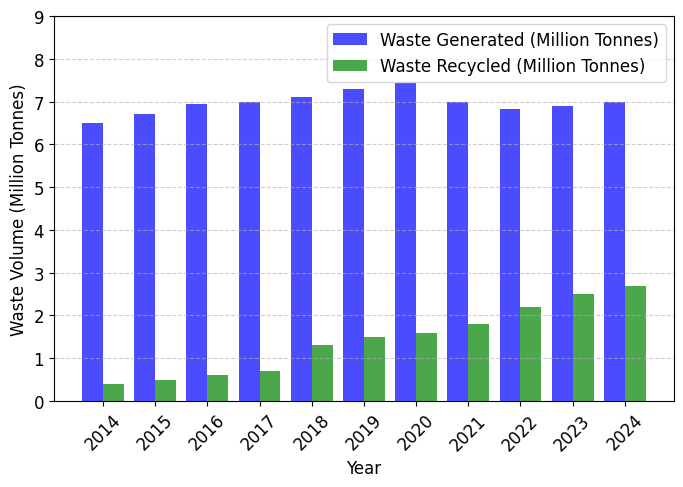

In [65]:
# Bar chart for Waste Generation vs Waste Recycled
plt.figure(figsize=(8, 5))
bar_width = 0.4
x_indexes = np.arange(len(years))

plt.bar(x_indexes - bar_width/2, waste_generated, width=bar_width, label='Waste Generated (Million Tonnes)', color='blue', alpha=0.7)
plt.bar(x_indexes + bar_width/2, waste_recycled, width=bar_width, label='Waste Recycled (Million Tonnes)', color='green', alpha=0.7)

plt.xticks(ticks=x_indexes, labels=years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Waste Volume (Million Tonnes)')
plt.ylim(0, 9)
# plt.title('Waste Generation and Recycling in Uzbekistan (2014–2024)')
plt.legend(loc="best")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\WasteGenAndWasteRecycled-bar.png", dpi=300, bbox_inches="tight")

plt.show()


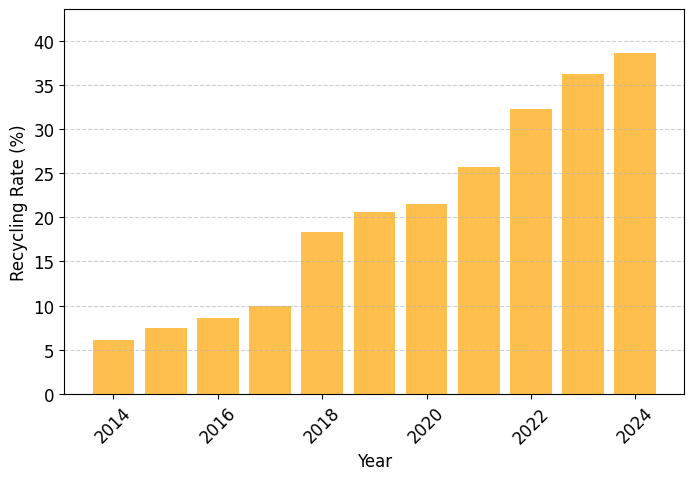

In [66]:
# Bar chart for Recycling Rate Over Time
plt.figure(figsize=(8, 5))
plt.bar(years, recycling_rate, color='orange', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Recycling Rate (%)')
# plt.title('Recycling Rate in Uzbekistan (2014–2024)')
plt.xticks(rotation=45)
plt.ylim(0, max(recycling_rate) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig(r"C:\Users\durdi\Documents\UzbMaqola\WasteRecycledRate-bar.png", dpi=300, bbox_inches="tight")

plt.show()